Enter a probable spam or ham text : NIGGGGGGGER


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


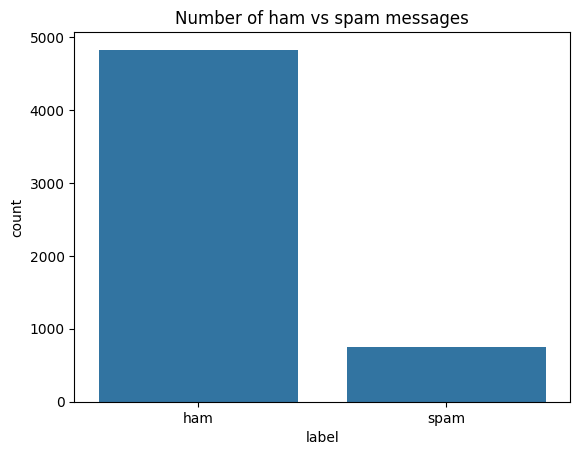

Accuracy: 0.9748878923766816

Classification Report:

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       966
        spam       1.00      0.81      0.90       149

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



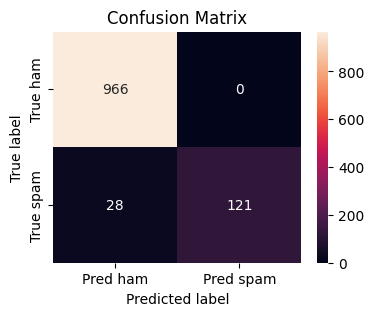

Message: NIGGGGGGGER
Prediction: Not Spam (Ham)
Confidence: 0.94


In [8]:
##------------- SPAM DETECTOR ------------------- ##
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
INPUT_STRING = input("Enter a probable spam or ham text :")
# Load the dataset (update the path if needed)
df = pd.read_csv("spam.csv", encoding="latin-1")

# Look at the first few rows
df.head()
# Keep only the useful columns (v1: label, v2: text)
df = df[['v1', 'v2']]

# Rename them to something meaningful
df = df.rename(columns={'v1': 'label', 'v2': 'text'})

df.head()
df.info()
df['label'].value_counts()
# Drop missing values just in case
df = df.dropna()

# Map labels to numbers
label_mapping = {'ham': 0, 'spam': 1}
df['label_num'] = df['label'].map(label_mapping)

df.head()
sns.countplot(x='label', data=df)
plt.title("Number of ham vs spam messages")
plt.show()
X = df['text']           # text messages
y = df['label_num']      # 0 or 1

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

len(X_train), len(X_test)
# Create the vectorizer
tfidf = TfidfVectorizer(
    stop_words='english',   # remove common words like "the", "and"
    max_df=0.9,             # ignore very frequent terms
    min_df=5                 # ignore very rare terms
)

# Learn vocabulary & transform training data
X_train_tfidf = tfidf.fit_transform(X_train)

# Only transform test data (do NOT fit again!)
X_test_tfidf = tfidf.transform(X_test)

X_train_tfidf.shape, X_test_tfidf.shape
model = LogisticRegression(max_iter=1000)  # increase max_iter to be safe
model.fit(X_train_tfidf, y_train)
# Predictions on test set
y_pred = model.predict(X_test_tfidf)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Pred ham', 'Pred spam'],
            yticklabels=['True ham', 'True spam'])
plt.title("Confusion Matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()
def predict_message(message: str):
    # Put the message in a list because transform expects an iterable
    msg_tfidf = tfidf.transform([message])
    pred = model.predict(msg_tfidf)[0]
    prob = model.predict_proba(msg_tfidf)[0][pred]

    label = "Spam" if pred == 1 else "Not Spam (Ham)"
    print(f"Message: {message}")
    print(f"Prediction: {label}")
    print(f"Confidence: {prob:.2f}")

# Try some examples
predict_message(INPUT_STRING)
import pickle

with open("spam_tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

with open("spam_classifier_model.pkl", "wb") as f:
    pickle.dump(model, f)
with open("spam_tfidf_vectorizer.pkl", "rb") as f:
    tfidf_loaded = pickle.load(f)

with open("spam_classifier_model.pkl", "rb") as f:
    model_loaded = pickle.load(f)
    